# Intensity Transformation

## Purpose
- Make the brightness distribution of the image more balanced
- Highlight the parts of interest

## Characteristics
- The transformation function is set mannually
- Transform each pixel value individually
- Different purposes with different methods

## Common Transformations
- Image Binarization
- Image Negatives
- Log Transformation
- Gamma Transformation

# Image Binarization

Divide the image into foreground and background according to the set threshold:

$$I = I(I > threshold)$$

- Single Threshold: Divide an image into foreground and background based on pixel values.

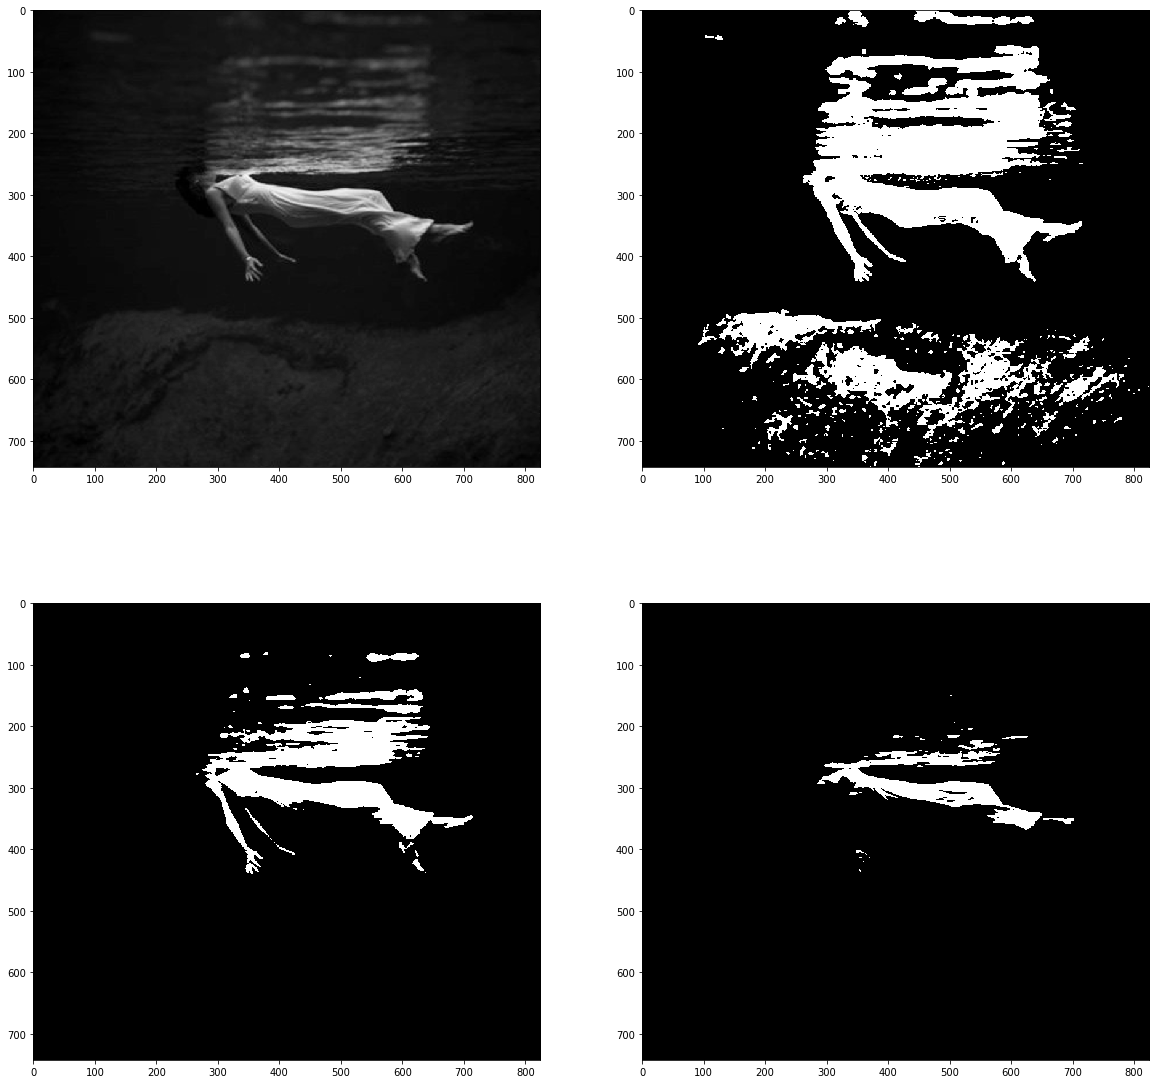

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./water.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.imshow(image, cmap='gray')

image32 = np.uint8(image > 32)
plt.subplot(222)
plt.imshow(image32, cmap='gray')

image64 = np.uint8(image > 64)
plt.subplot(223)
plt.imshow(image64, cmap='gray')

image128 = np.uint8(image > 128)
plt.subplot(224)
plt.imshow(image128, cmap='gray')
plt.show()

- Multiple Thresholds: Divide an image into regions based on pixel values.

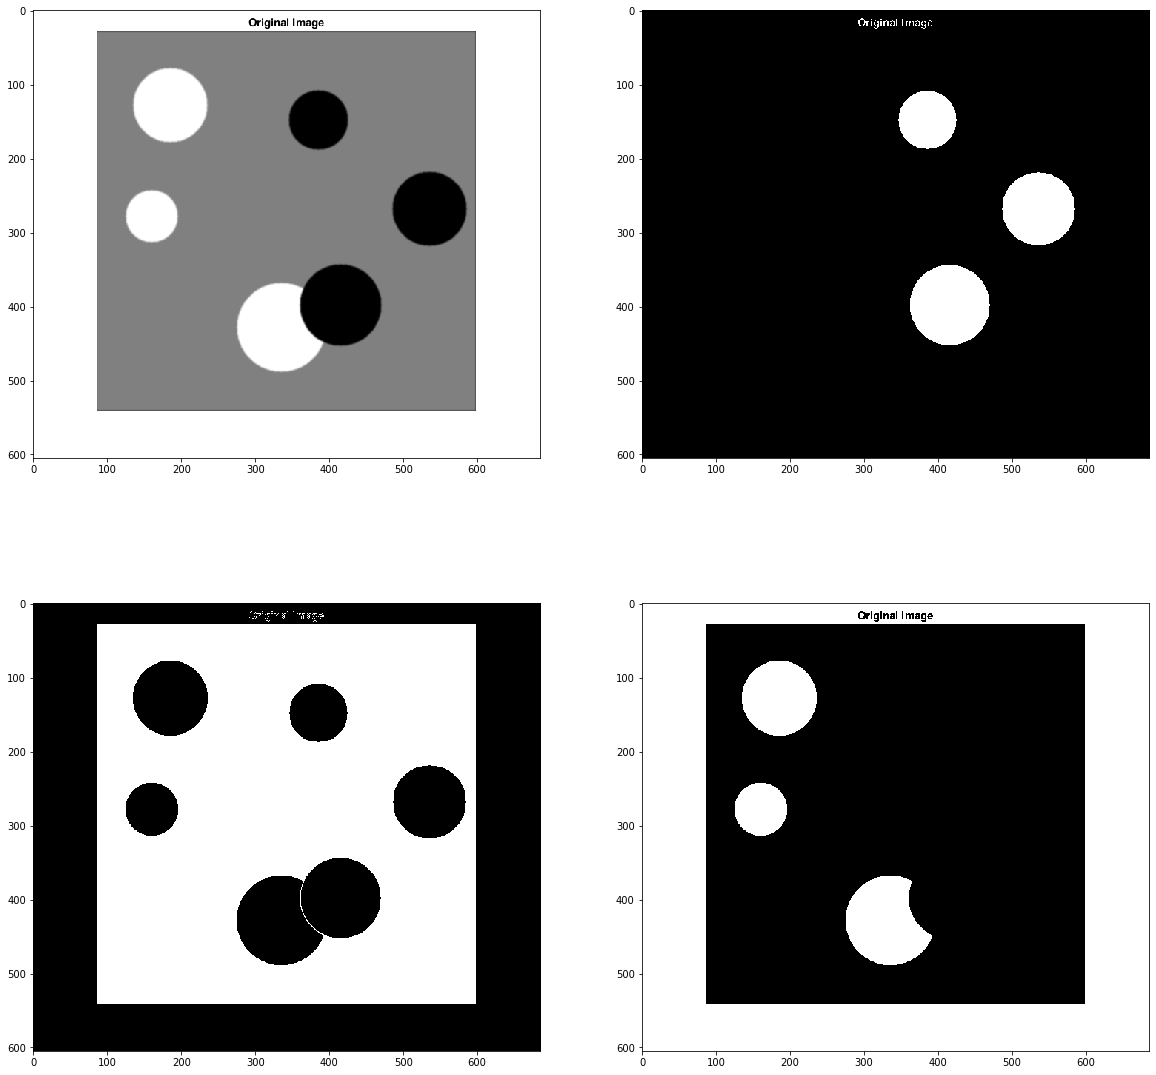

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./circlesBrightDark.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.imshow(image, cmap='gray')

image32 = np.uint8(image < 32)
plt.subplot(222)
plt.imshow(image32, cmap='gray')

image64 = np.uint8((image > 32) & (image < 160))
plt.subplot(223)
plt.imshow(image64, cmap='gray')

image128 = np.uint8(image > 160)
plt.subplot(224)
plt.imshow(image128, cmap='gray')
plt.show()

- Only interested in pixels with values within the interval [a, b]:
$$f(p)= \begin{cases}0 & \text { if } p<a \\ M \times \frac{p-a}{b-a} & \text { if } a \leq p \leq b \\ M & \text { if } p>b\end{cases}$$

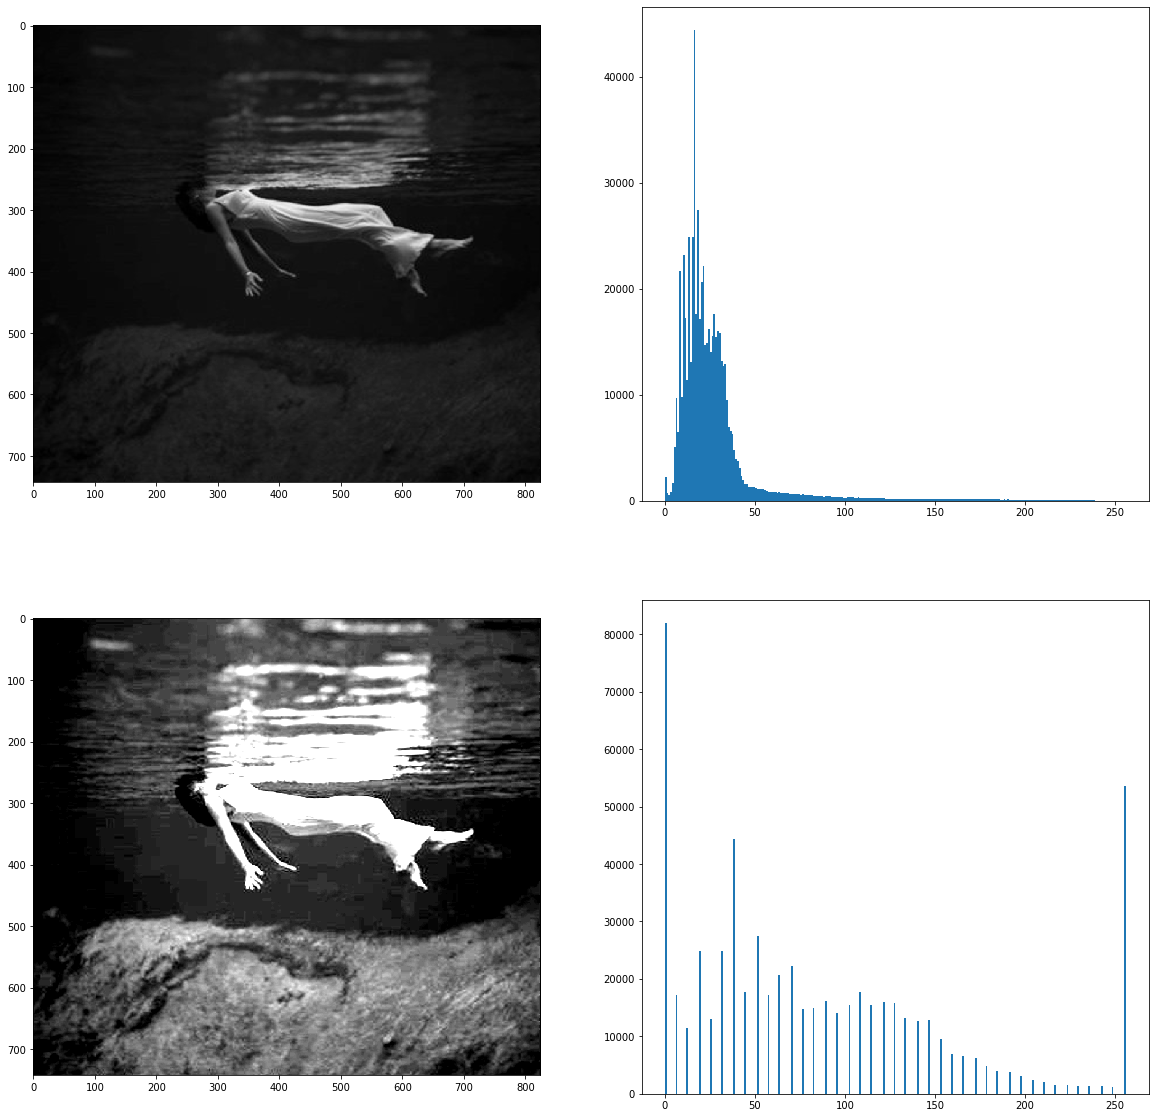

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./water.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)
plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.subplot(222)
plt.hist(image.flatten(), bins=256, range=[0,256])

a, b = 10, 50
image = (image - a) / (b - a) * 255
image[image < 0]  = 0
image[image > 255]= 255

plt.subplot(223)
plt.imshow(image, cmap='gray')
plt.subplot(224)
plt.hist(np.uint8(image).flatten(), bins=256, range=[0,256])
plt.show()

# Image Negatives
- To highlight the details of interest, it is not necessary to equalize the pixel distribution:
$$I = 255 - I$$

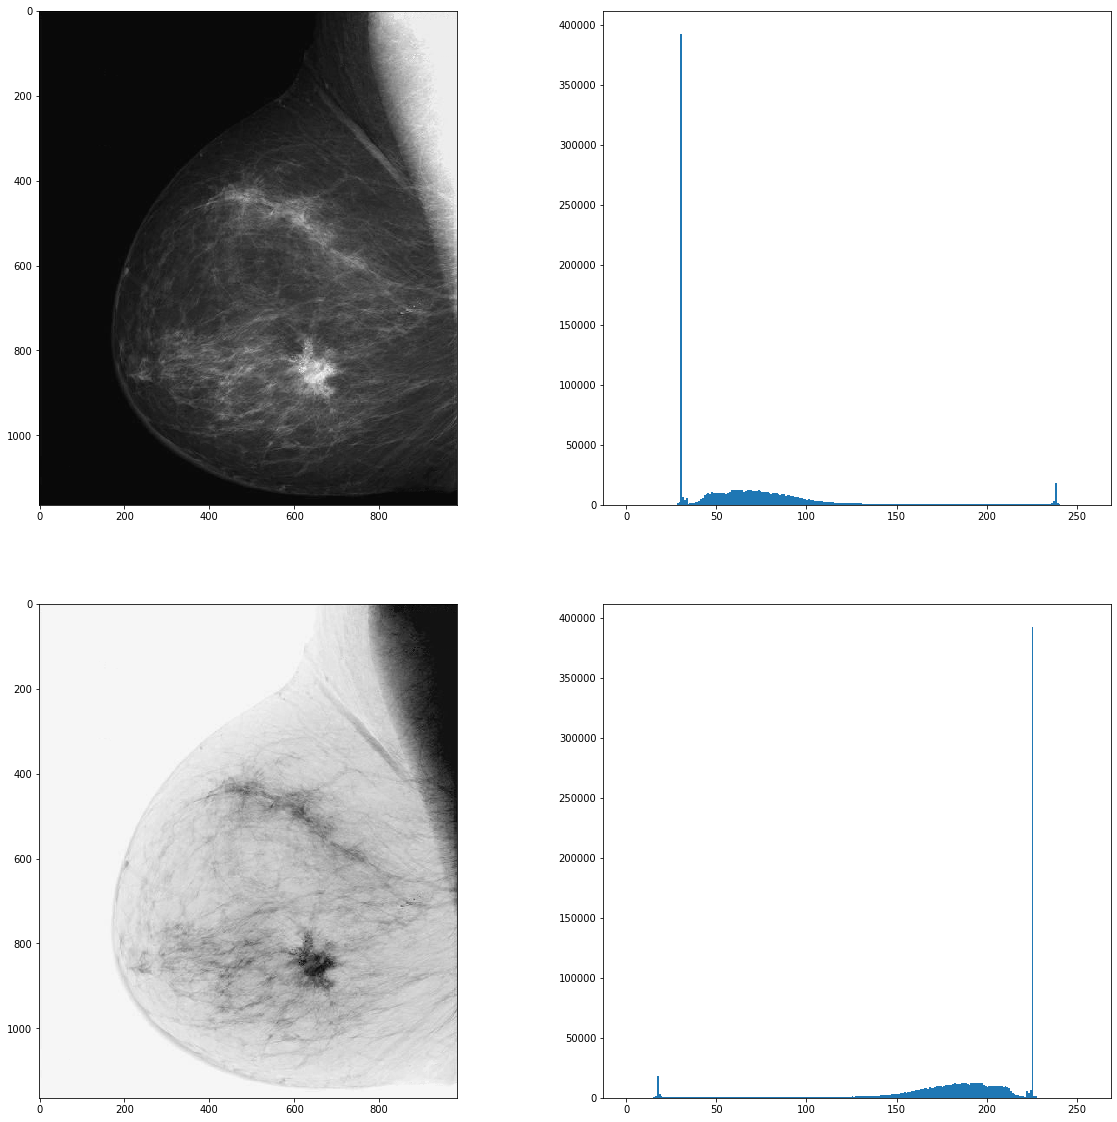

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./Fig0203(a).tif', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.subplot(222)
plt.hist(image.flatten(), bins=256, range=[0,256])

plt.subplot(223)
image = 255-image
plt.imshow(image, cmap='gray')
plt.subplot(224)
plt.hist(image.flatten(), bins=256, range=[0,256])
plt.show()

# Log Transformation

The main function of the logarithmic transformation of the image is to compress the dynamic range. 

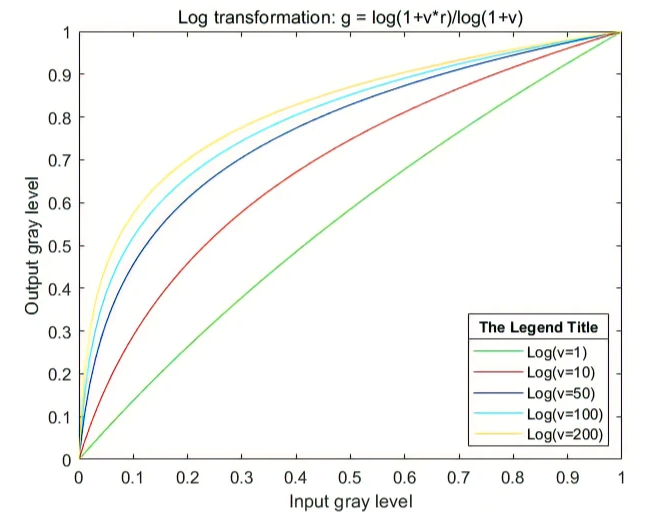

The logarithmic curve has a large slope in the area with low pixel values, and a small slope in the area with high pixel values. We use this type of transformation to expand dark pixel values in an image while compressing high grayscale values:

$$I = c \cdot \log(1 + I)$$

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


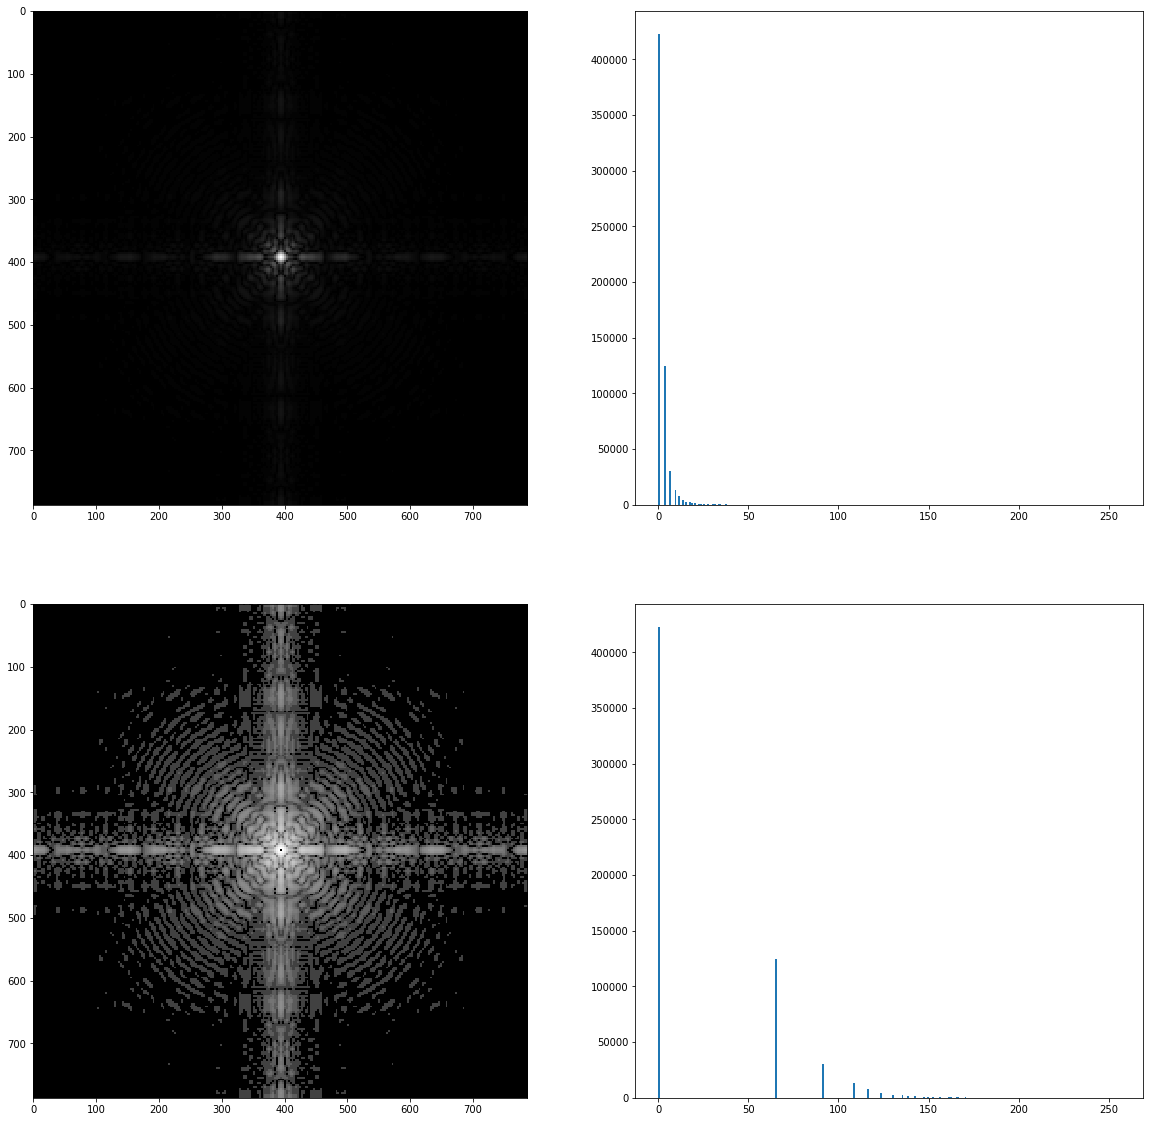

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./Fig0205(a).tif', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.subplot(222)
plt.hist(image.flatten(), bins=256, range=[0,256])

image = np.log(1 + image)
image = np.uint8(image / image.max() * 255)
plt.subplot(223)
plt.imshow(image, cmap='gray')
plt.subplot(224)
plt.hist(image.flatten(), bins=256, range=[0,256])
plt.show()

# Gamma Transformation

- Issue: Overall image is too bright or too dark.

- Goal: Make the brightness distribution of the image uniform, enhance the dark area, and compress the bright area.

- Applicable Range: Both grayscale and color images are applicable.
    1. $\gamma$ < 1: Increase the overall brightness of the image;
    2. $\gamma$ > 1: Reduce the overall brightness of the image.
    
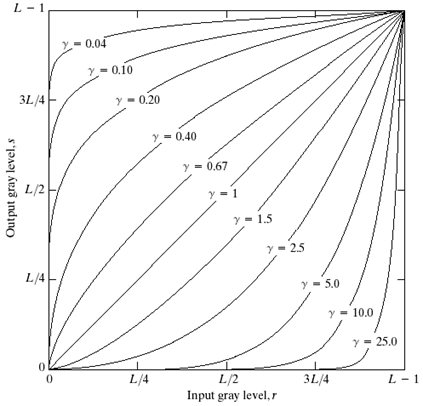

- Steps: 
    1. Normalize the image
    2. Exponential operation
    3. Denormalize

### $\gamma < 1$ for Grayscale  Image

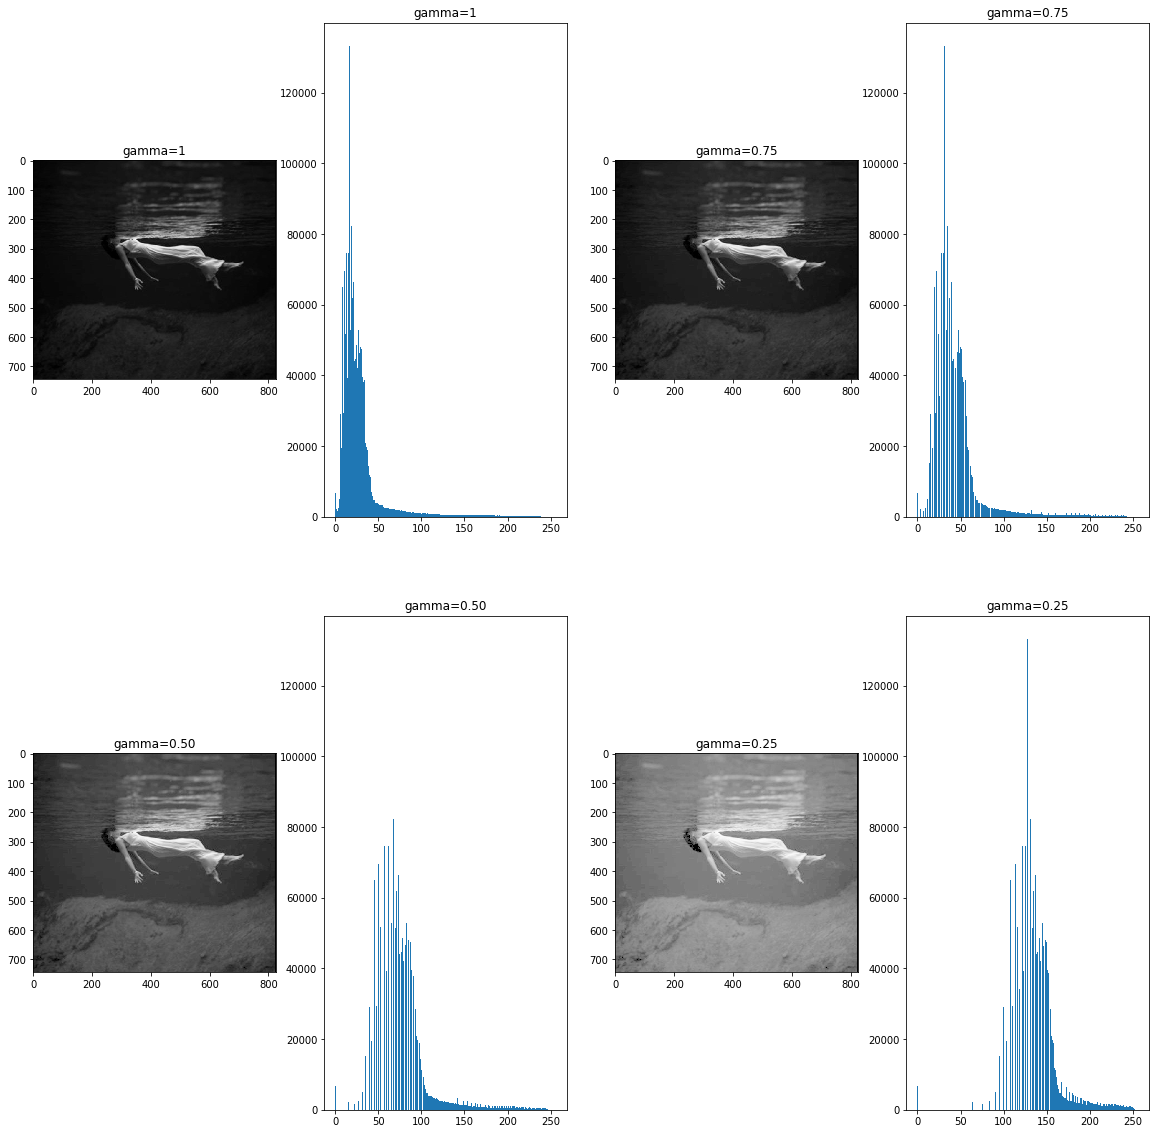

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./water.png', cv2.IMREAD_GRAYSCALE)

# normalize the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.0

image_origin = np.uint8(image * 255)

plt.figure(figsize=(20, 20))
plt.subplot(241)
plt.title('gamma=1')
plt.imshow(image_origin)
plt.subplot(242)
plt.title('gamma=1')
plt.hist(image_origin.flatten(), bins=256, range=[0,256])

# exponential operation
image_gamma = np.uint8((image ** 0.75) * 255)
plt.subplot(243)
plt.title('gamma=0.75')
plt.imshow(image_gamma)
plt.subplot(244)
plt.title('gamma=0.75')
plt.hist(image_gamma.flatten(), bins=256, range=[0,256])

image_gamma = np.uint8((image ** 0.5) * 255)
plt.subplot(245)
plt.title('gamma=0.50')
plt.imshow(image_gamma)
plt.subplot(246)
plt.title('gamma=0.50')
plt.hist(image_gamma.flatten(), bins=256, range=[0,256])

# denormalize
image_gamma = np.uint8((image ** 0.25) * 255)
plt.subplot(247)
plt.title('gamma=0.25')
plt.imshow(image_gamma)
plt.subplot(248)
plt.title('gamma=0.25')
plt.hist(image_gamma.flatten(),  bins=256,  range=[0,256])

plt.show()

### $\gamma > 1$ for Grayscale  Image

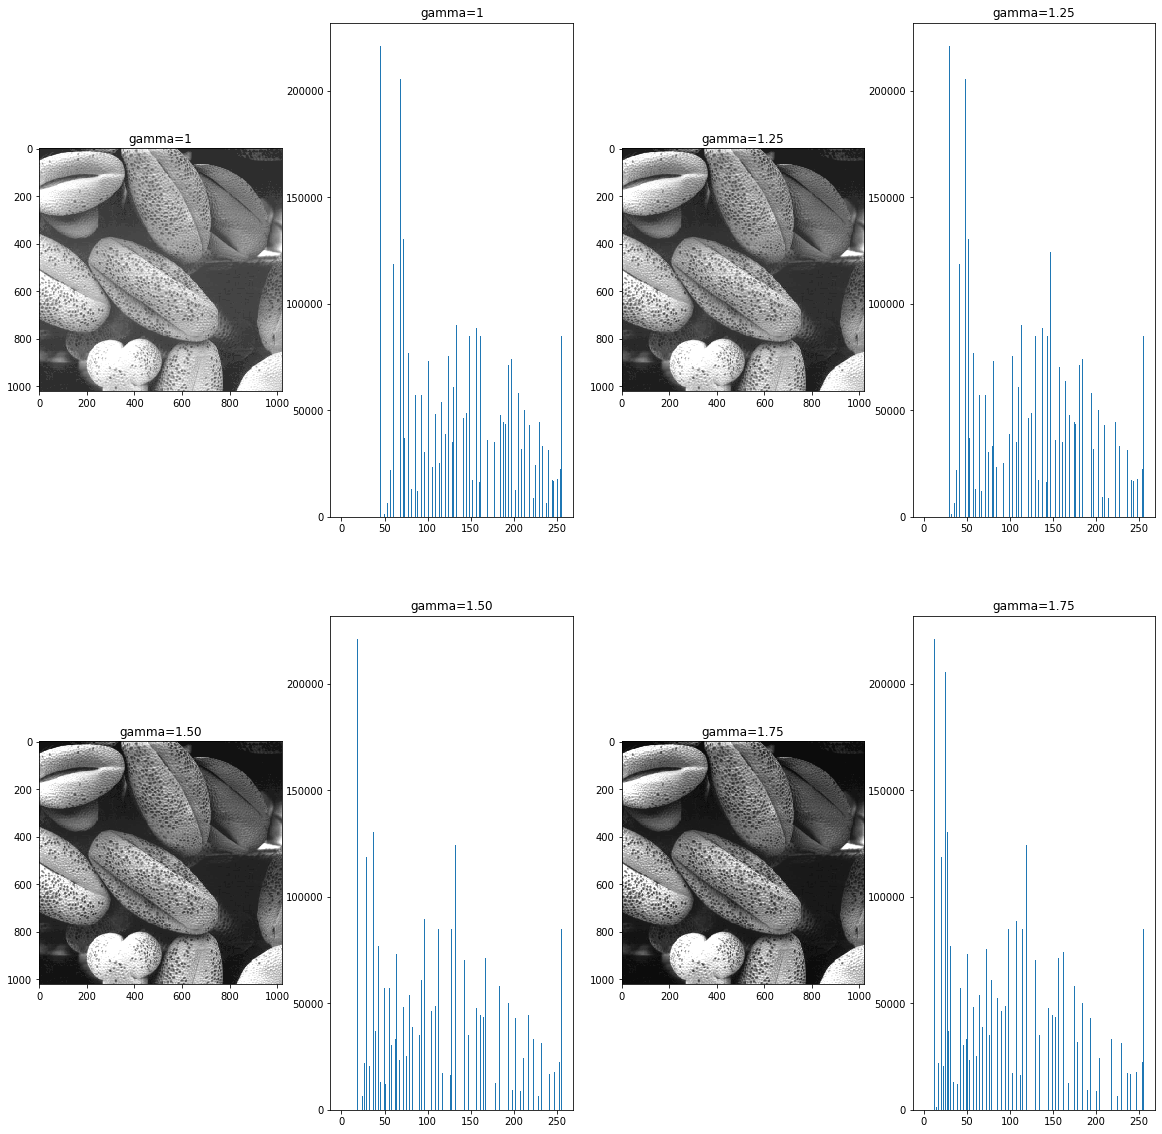

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./Fig0208(a).tif', cv2.IMREAD_GRAYSCALE)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.0

image_origin = np.uint8(image * 255)

plt.figure(figsize=(20, 20))
plt.subplot(241)
plt.title('gamma=1')
plt.imshow(image_origin)
plt.subplot(242)
plt.title('gamma=1')
plt.hist(image_origin.flatten(), bins=256, range=[0,256])

image_gamma = np.uint8((image ** 1.25) * 255)
plt.subplot(243)
plt.title('gamma=1.25')
plt.imshow(image_gamma)
plt.subplot(244)
plt.title('gamma=1.25')
plt.hist(image_gamma.flatten(), bins=256, range=[0,256])

image_gamma = np.uint8((image ** 1.5) * 255)
plt.subplot(245)
plt.title('gamma=1.50')
plt.imshow(image_gamma)
plt.subplot(246)
plt.title('gamma=1.50')
plt.hist(image_gamma.flatten(), bins=256, range=[0,256])

image_gamma = np.uint8((image ** 1.75) * 255)
plt.subplot(247)
plt.title('gamma=1.75')
plt.imshow(image_gamma)
plt.subplot(248)
plt.title('gamma=1.75')
plt.hist(image_gamma.flatten(), bins=256, range=[0,256])
plt.show()

### RGB Color Image

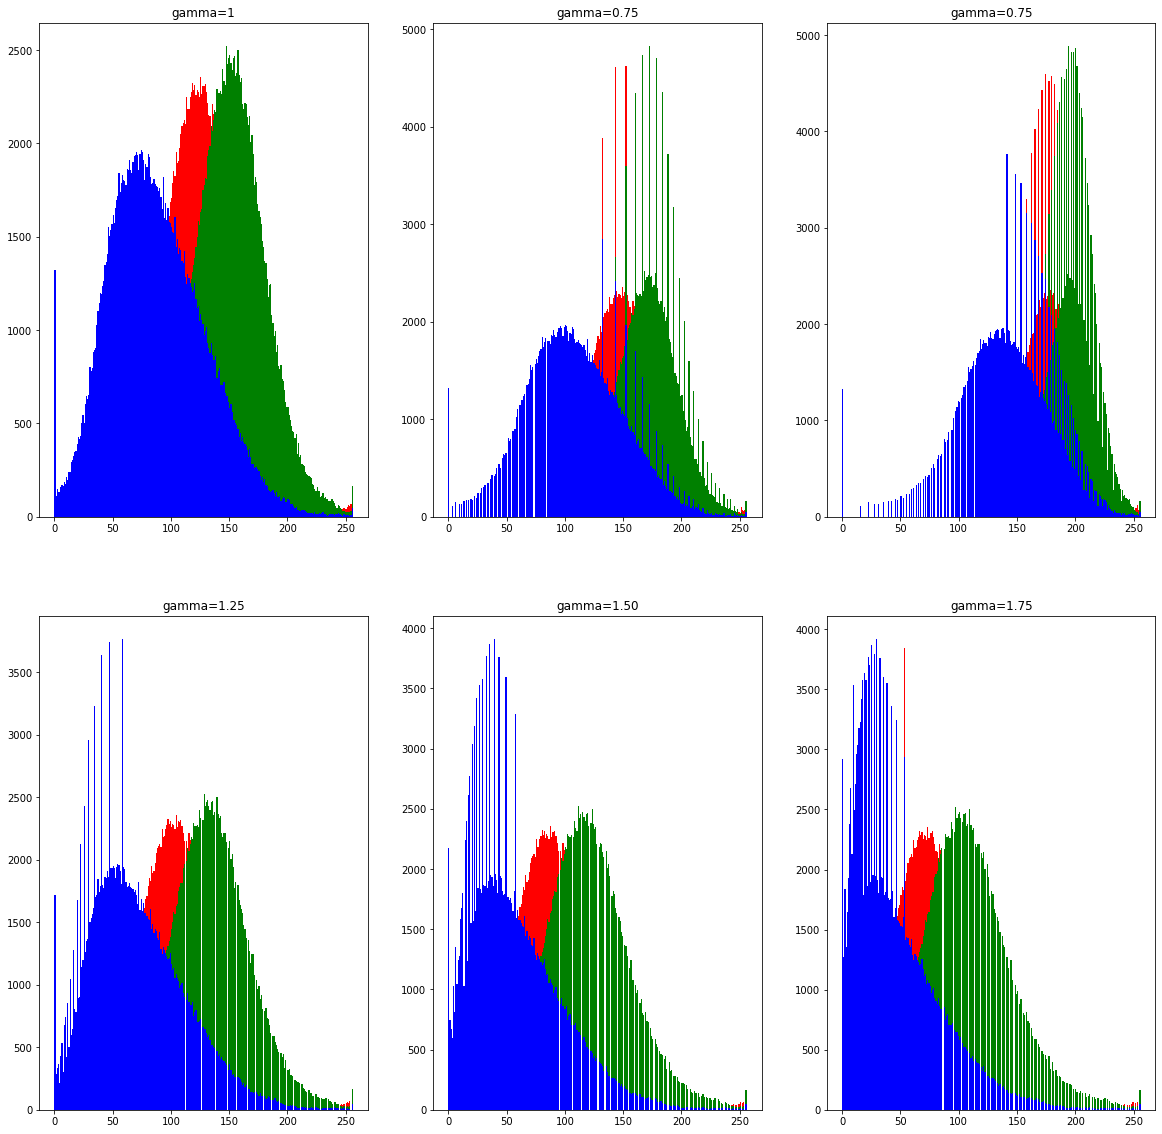

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(image):
    if flag:
        plt.imshow(image_gamma)
    else:
        plt.hist(image_gamma[:,:,0].flatten(), bins=256, range=[0,256], color='r')
        plt.hist(image_gamma[:,:,1].flatten(), bins=256, range=[0,256], color='g')
        plt.hist(image_gamma[:,:,2].flatten(), bins=256, range=[0,256], color='b')

flag  = False
image = cv2.imread('./rabbit.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)/255.0

image_gamma = np.uint8(image*255)

plt.figure(figsize=(20, 20))
plt.subplot(231)
plt.title('gamma=1')
show_image(image_gamma)

image_gamma = np.uint8((image**0.75)*255)
plt.subplot(232)
plt.title('gamma=0.75')
show_image(image_gamma)

image_gamma = np.uint8((image**0.50)*255)
plt.subplot(233)
plt.title('gamma=0.75')
show_image(image_gamma)

image_gamma = np.uint8((image**1.25)*255)
plt.subplot(234)
plt.title('gamma=1.25')
show_image(image_gamma)

image_gamma = np.uint8((image**1.5)*255)
plt.subplot(235)
plt.title('gamma=1.50')
show_image(image_gamma)

image_gamma = np.uint8((image**1.75)*255)
plt.subplot(236)
plt.title('gamma=1.75')
show_image(image_gamma)
plt.show()

# Histogram Equalization & Matching

## Histogram 

### Gray Image

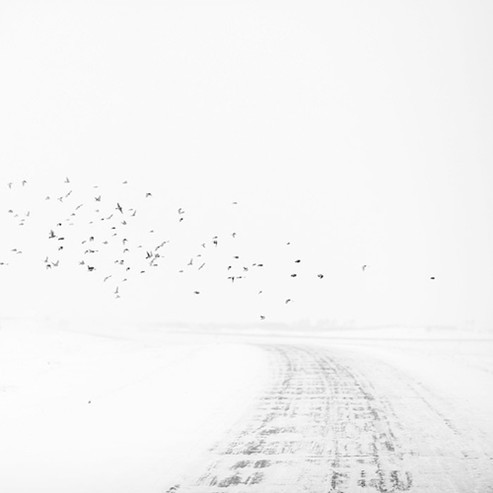

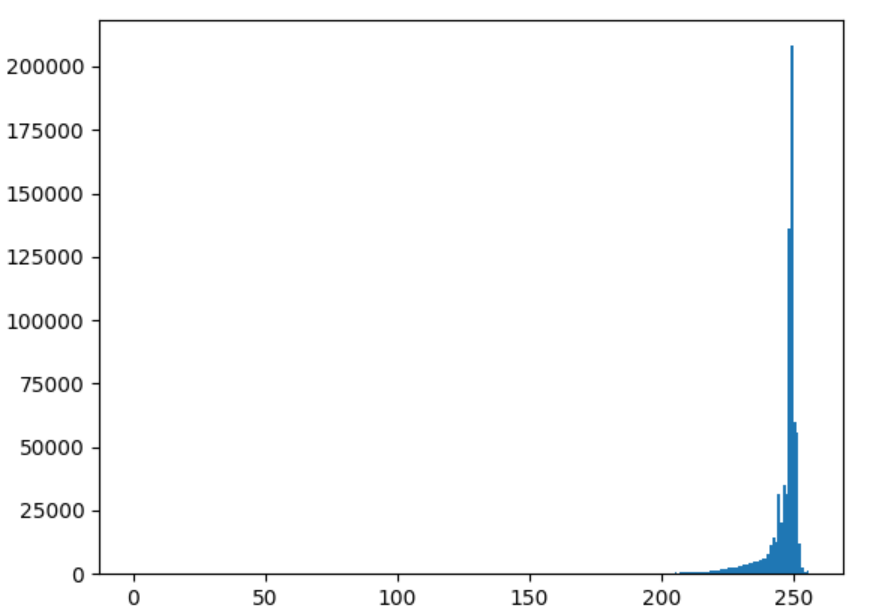

### RGB Color Image

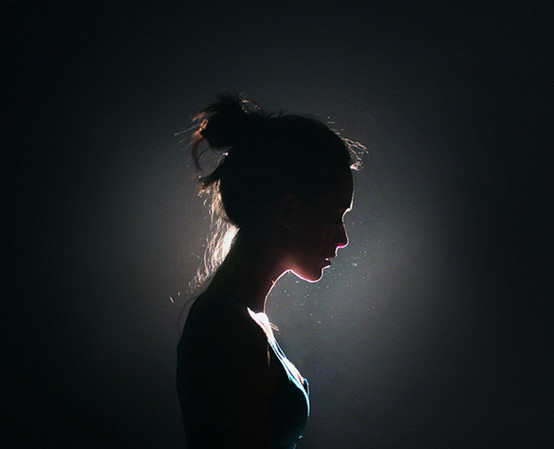

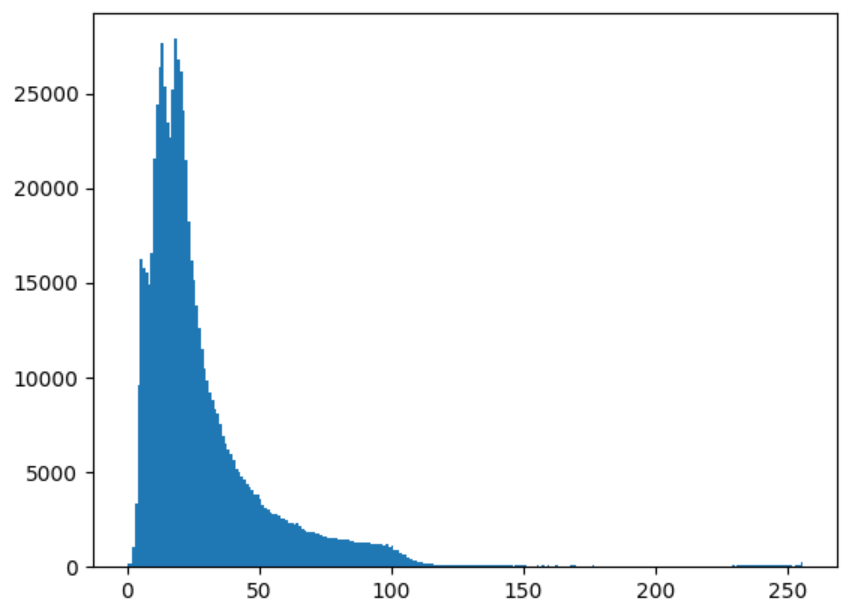

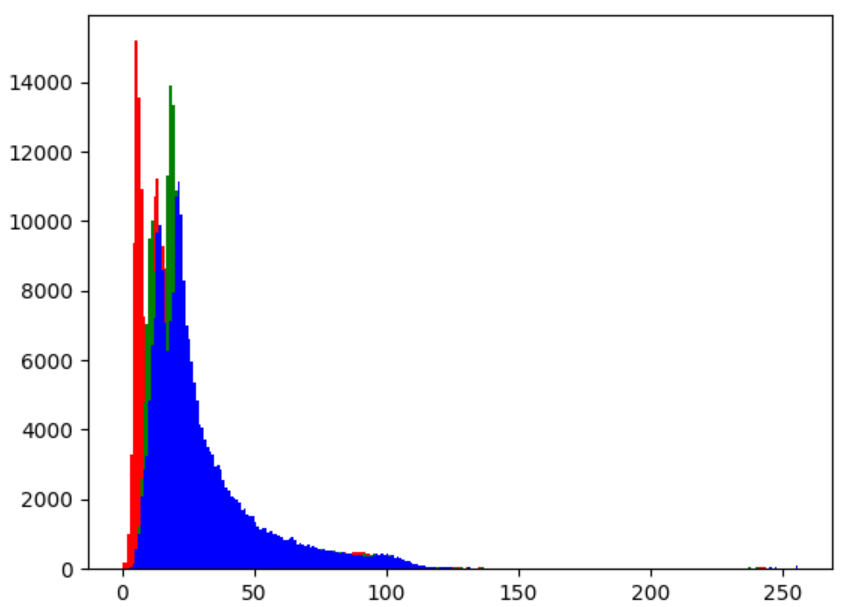

The histogram reflects the distribution of image brightness and color.

## Histogram Calculation

### Gray Image

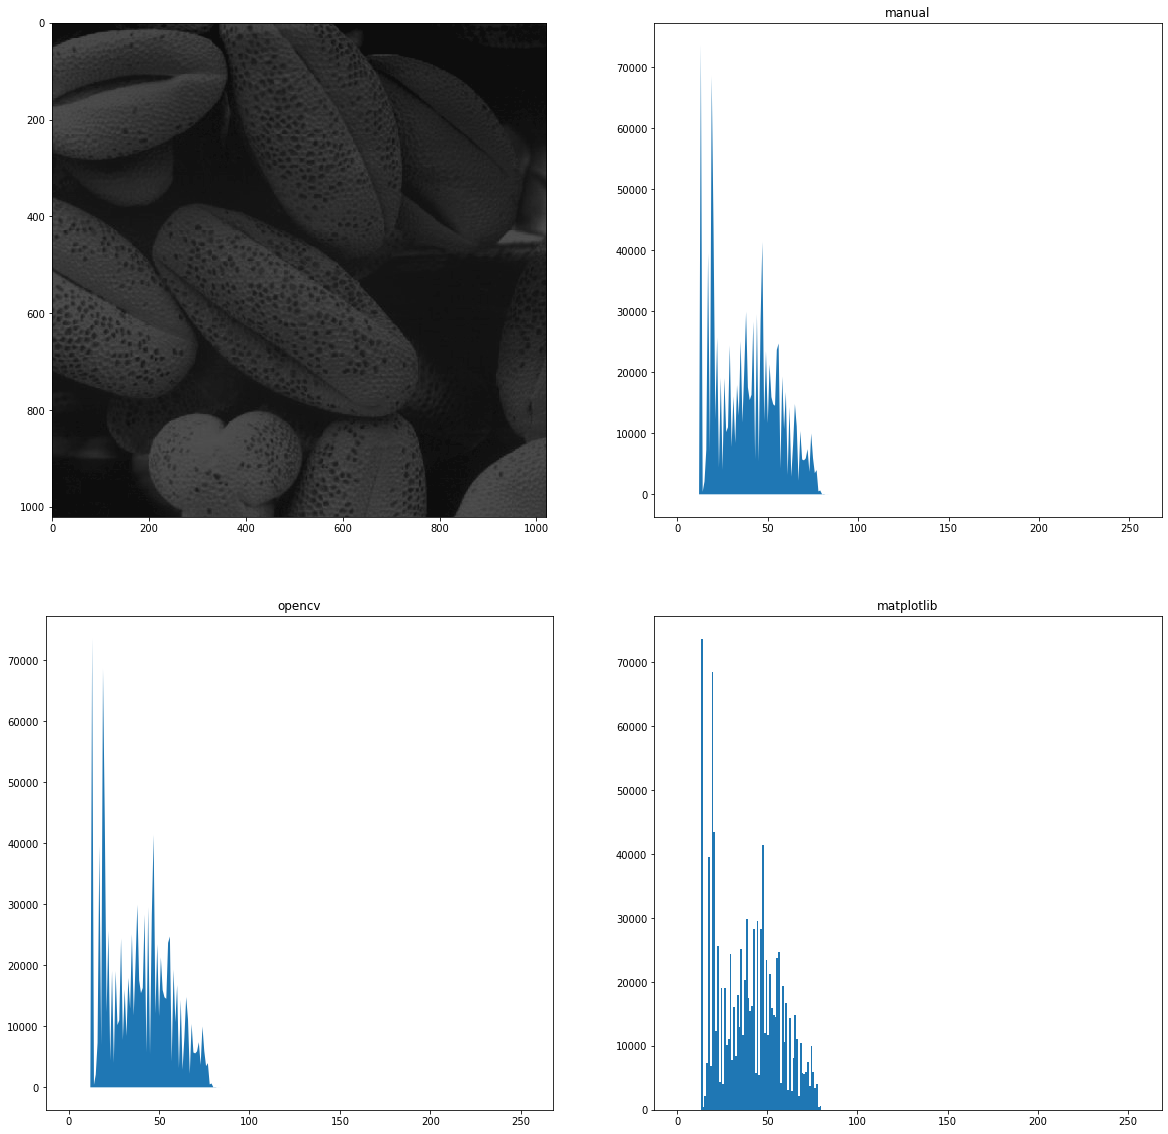

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./Fig0208(a)-low.tif', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

# Calculate the histogram
hist  = np.zeros(256)
for pixel in image.flatten():
    hist[pixel]+=1
plt.subplot(222)
plt.title('manual')
plt.fill_between(x=np.arange(0, 256), y1=hist, y2=0)

# Calculate the histogram using OpenCV
hist = cv2.calcHist([image], channels=[0], mask=None, histSize=[256], ranges=[0,256])[:,0]
plt.subplot(223)
plt.title('opencv')
plt.fill_between(x=np.arange(0, 256), y1=hist, y2=0)

## Visualize the histogram
plt.subplot(224)
plt.title('matplotlib')
plt.hist(image.flatten(), bins=256, range=(0,256))
plt.show()

### RGB Color Image

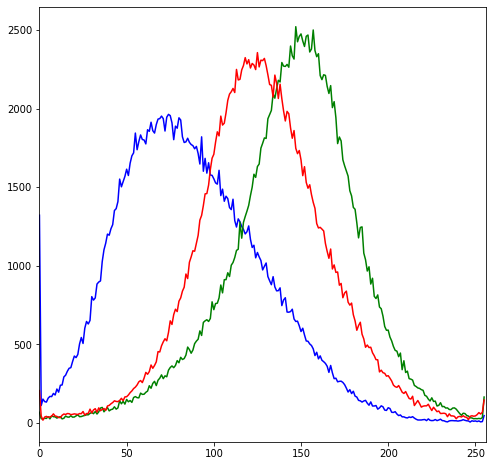

In [10]:
img = cv2.imread('./rabbit.jpg') 
color = ('b','g','r')
plt.figure(figsize=(8, 8))
for i,col in enumerate(color): 
    histr = cv2.calcHist([img],[i],None,[256],[0,256]) 
    plt.plot(histr, color = col) 
    plt.xlim([0,256])

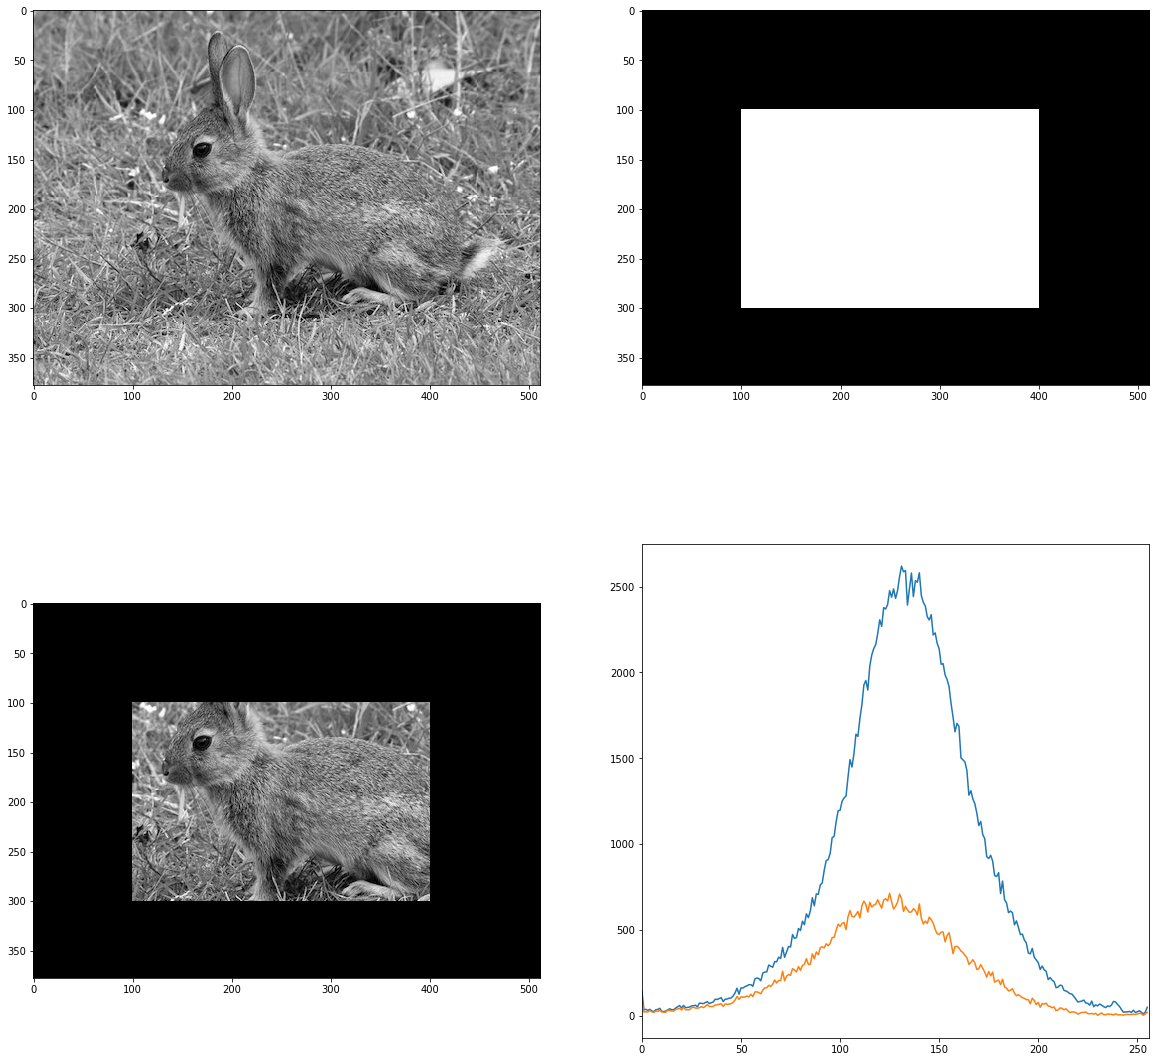

In [11]:
img = cv2.imread('./rabbit.jpg')
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255

img = cv2.imread('./rabbit.jpg', 0)
masked_img = cv2.bitwise_and(img, img, mask=mask)

hist_full = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0, 256])

plt.figure(figsize=(20, 20))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0, 256])
plt.show()

## Histogram Equalization

Histogram Equalization is a method of computer image processing to adjust the contrast of the image using the histogram of the image. 

Histogram Equalization can be achieved by redistributing the most frequent intensity values present in the image's histogram. This process leads to the improvement in the overall contrast of the image. 

Histogram Equalization can be used for images with both dark and bright backgrounds but can lead to increasing the contrast of the background noise, since the process does not bifurcate noise and signal values. 

The method can be used to enhance low contrast images for better viewing ability like x-ray, thermal and satellite images. 

Histogram Equalization is a computationally efficient technique which in theory can be used to recover the original image if the equalization function is known.

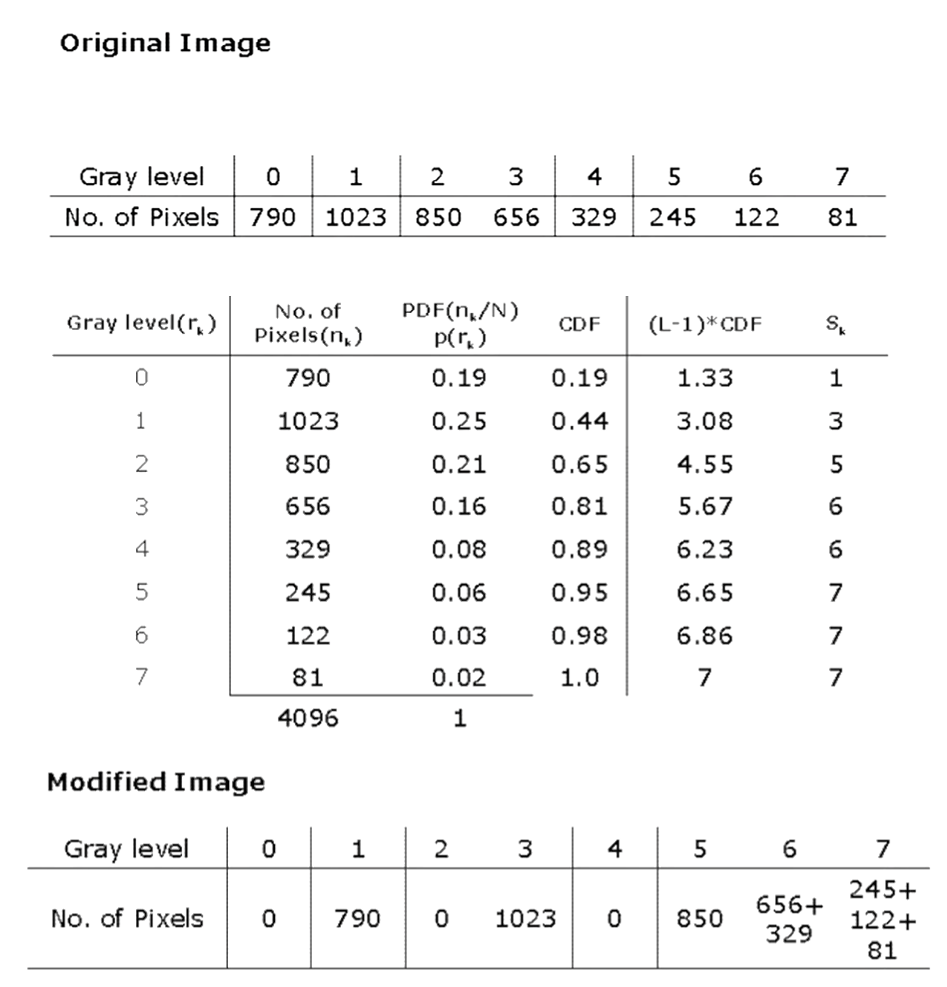

## cv2.equalizeHist

### Gray Image

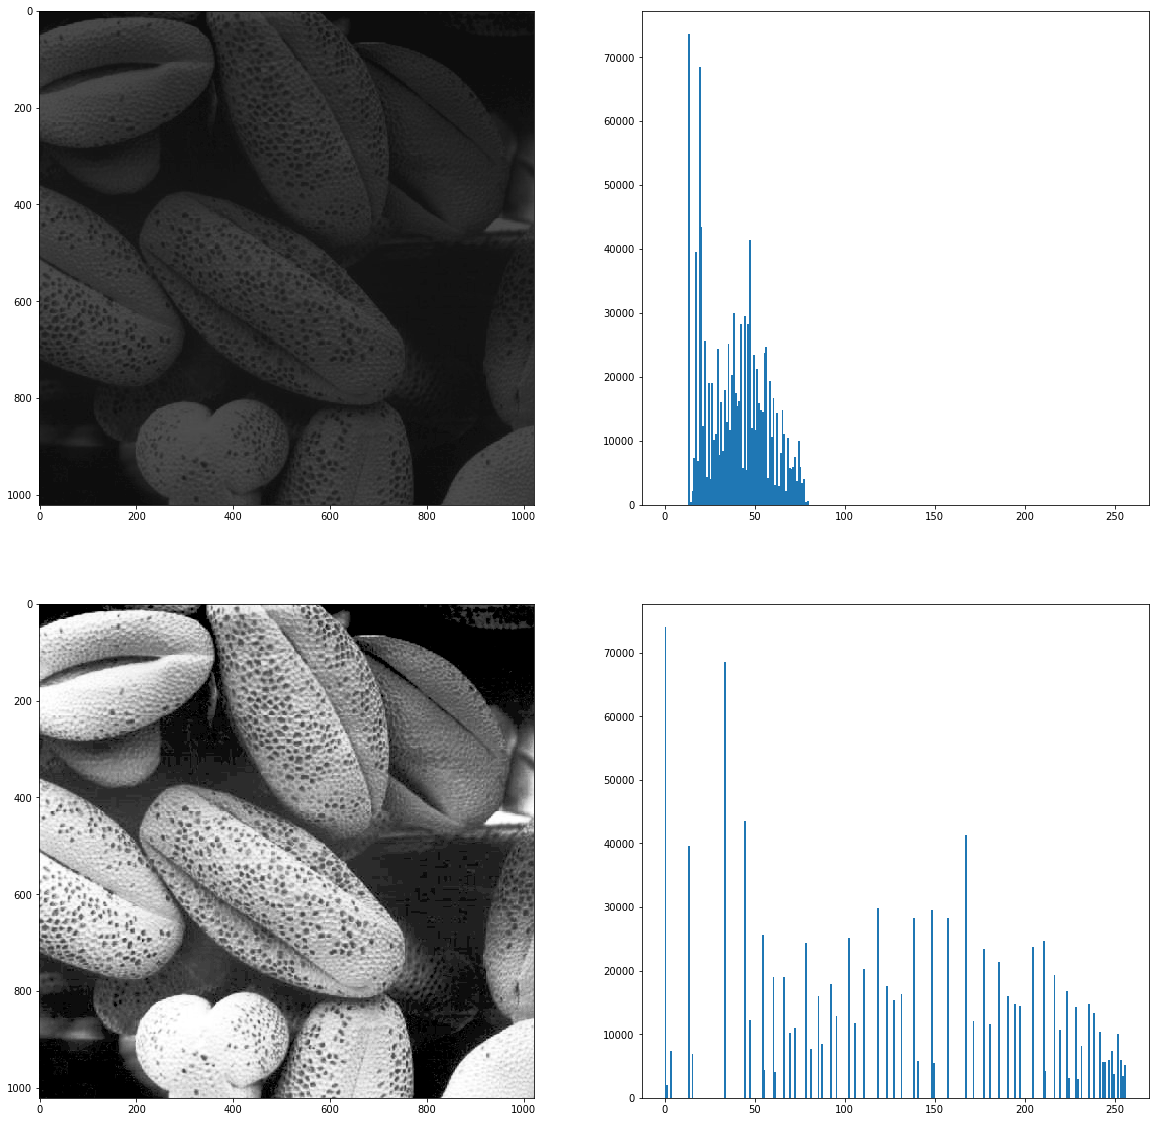

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./Fig0208(a)-low.tif', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.subplot(222)
plt.hist(image.flatten(), bins=256, range=(0,256))

# histogram equalization
image = cv2.equalizeHist(image)
plt.subplot(223)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.subplot(224)
plt.hist(image.flatten(), bins=256, range=(0,256))
plt.show()

### RGB Color Image

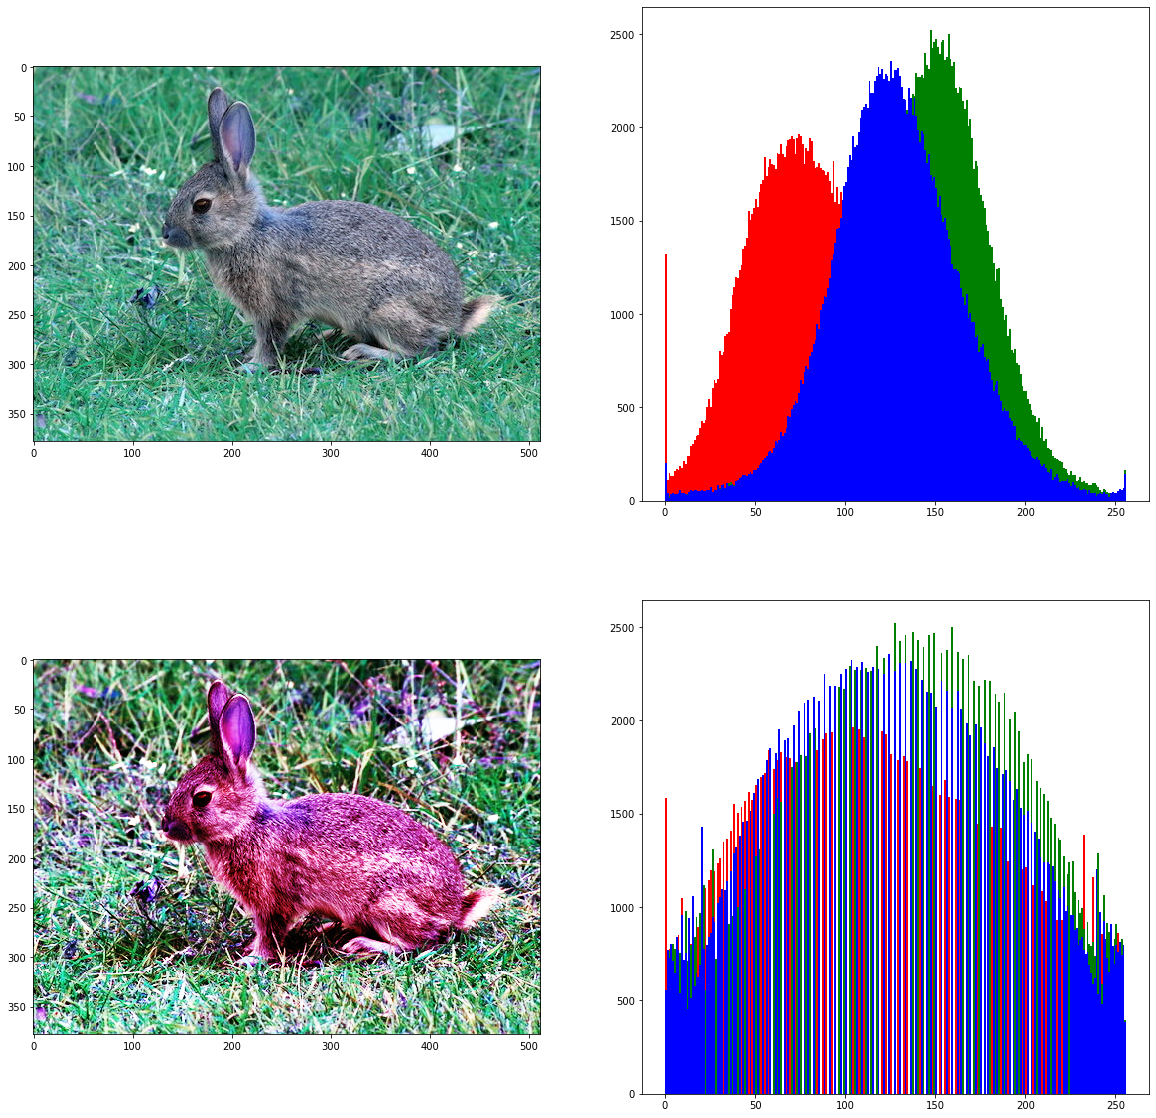

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./rabbit.jpg')

plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.imshow(image)
plt.subplot(222)
plt.hist(image[:,:,0].flatten(), bins=256, range=(0,256), color='r')
plt.hist(image[:,:,1].flatten(), bins=256, range=(0,256), color='g')
plt.hist(image[:,:,2].flatten(), bins=256, range=(0,256), color='b')

plt.subplot(223)
image0 = cv2.equalizeHist(image[:,:,0])
image1 = cv2.equalizeHist(image[:,:,1])
image2 = cv2.equalizeHist(image[:,:,2])
image  = np.stack([image0, image1, image2], axis=2)
plt.imshow(image)
plt.subplot(224)
plt.hist(image[:,:,0].flatten(), bins=256, range=(0,256), color='r')
plt.hist(image[:,:,1].flatten(), bins=256, range=(0,256), color='g')
plt.hist(image[:,:,2].flatten(), bins=256, range=(0,256), color='b')
plt.show()

## Histogram Matching

In image processing, histogram matching or histogram specification is the transformation of an image so that its histogram matches a specified histogram

Histogram equalization method is a special case in which the specified histogram is uniformly distributed.

Given two images, the reference and the input images, we compute their histograms:

1. Calculate the cumulative distribution functions (CDF) of the two images' histograms - $F_1$  for the reference imace and $F_2$ for the input image. 
2. For each gray level $L_1$, we find the gray level $L_2$, for which  $F_1(L_1) = F_2(L_2)$, and this is the result of histogram matching function: $M(L_1) =L_2$.
3. Apply the function $M$ on each pixel of the reference image.

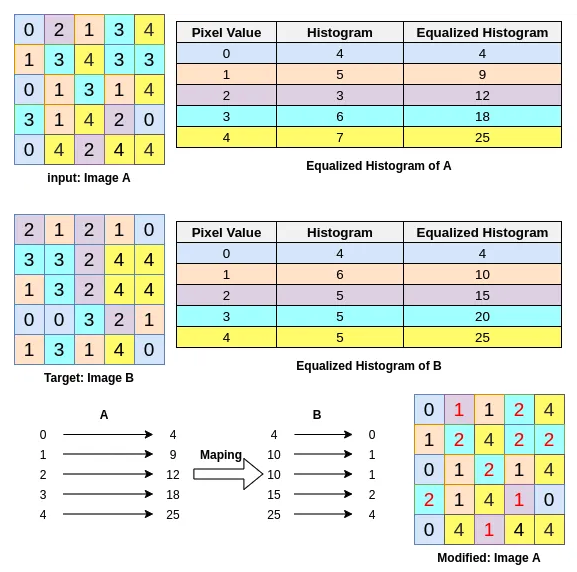

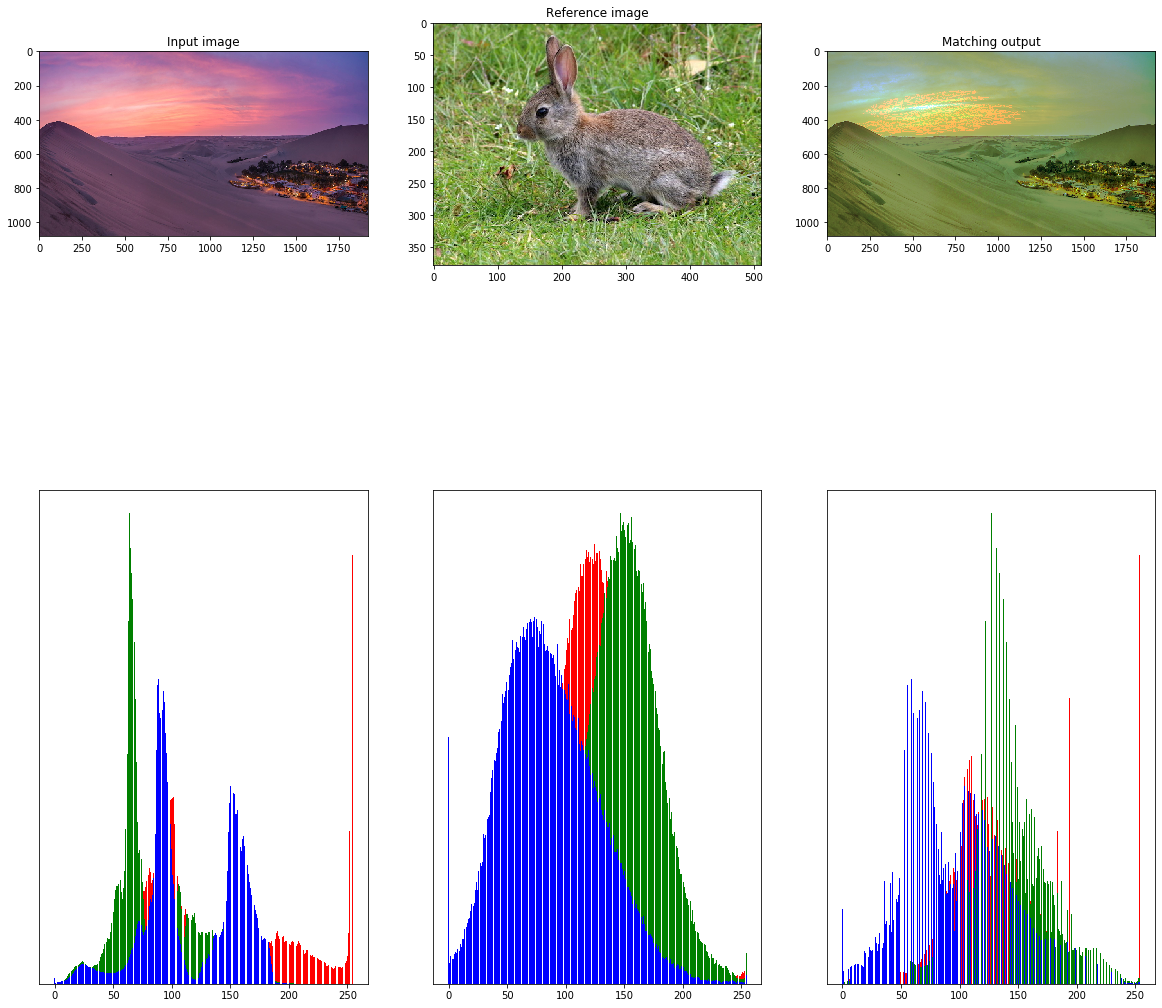

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_match(img, imgRef):
    # calculate cumulative histogram
    histImg, bins = np.histogram(img.flatten(), 256)     # calculate histogram of the input image
    histImg       = histImg / sum(histImg)
    histRef, bins = np.histogram(imgRef.flatten(), 256)  # calculate histogram of the reference image
    histRef       = histRef / sum(histRef)
    cdfImg        = histImg.cumsum()                     # calculate CDF of the input image
    cdfRef        = histRef.cumsum()                     # calculate CDF of the reference image

    # calculate the histogram-matching mapping function
    # 1. calculate the absolute value of the difference between each gray level of the cumulative histogram 
    # of the reference image and the gray level of the cumulative histogram of the input image
    # 2. find the minimum value corresponding to the absolute value and the
    # gray scale corresponding to the minimum value is the value after mapping.
    transM = np.zeros(256)
    for i in range(256):
        index = 0
        vMin = np.fabs(cdfImg[i] - cdfRef[0])
        for j in range(256):
            diff = np.fabs(cdfImg[i] - cdfRef[j])
            if (diff < vMin):
                index = int(j)
                vMin = diff
        transM[i] = index
    
    # histogram matching
    imgOut = transM[np.uint8(img)].astype(np.uint8)
    return imgOut

def show_image(img, number):
    plt.subplot(number, yticks=[])
    histImg, bins = np.histogram(img[:,:,0].flatten(), 256)
    plt.bar(bins[:-1], histImg, color='r')
    histImg, bins = np.histogram(img[:,:,1].flatten(), 256)
    plt.bar(bins[:-1], histImg, color='g')
    histImg, bins = np.histogram(img[:,:,2].flatten(), 256)
    plt.bar(bins[:-1], histImg, color='b')

if __name__=='__main__':

    img    = cv2.imread("landscape.jpg").astype(np.float32)
    img    = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgRef = cv2.imread("rabbit.jpg").astype(np.float32)
    imgRef = cv2.cvtColor(imgRef, cv2.COLOR_BGR2RGB)

    imgOut0 = histogram_match(img[:,:,0], imgRef[:,:,0])
    imgOut1 = histogram_match(img[:,:,1], imgRef[:,:,1])
    imgOut2 = histogram_match(img[:,:,2], imgRef[:,:,2])
    imgOut  = np.stack([imgOut0, imgOut1, imgOut2], axis=2)
    
    plt.figure(figsize=(20, 20))
    plt.subplot(231)
    plt.title("Input image")
    plt.imshow(np.uint8(img))
    plt.subplot(232)
    plt.title("Reference image")
    plt.imshow(np.uint8(imgRef))
    plt.subplot(233)
    plt.title("Matching output")
    plt.imshow(imgOut)

    show_image(img   , 234)
    show_image(imgRef, 235)
    show_image(imgOut, 236)
    plt.show()

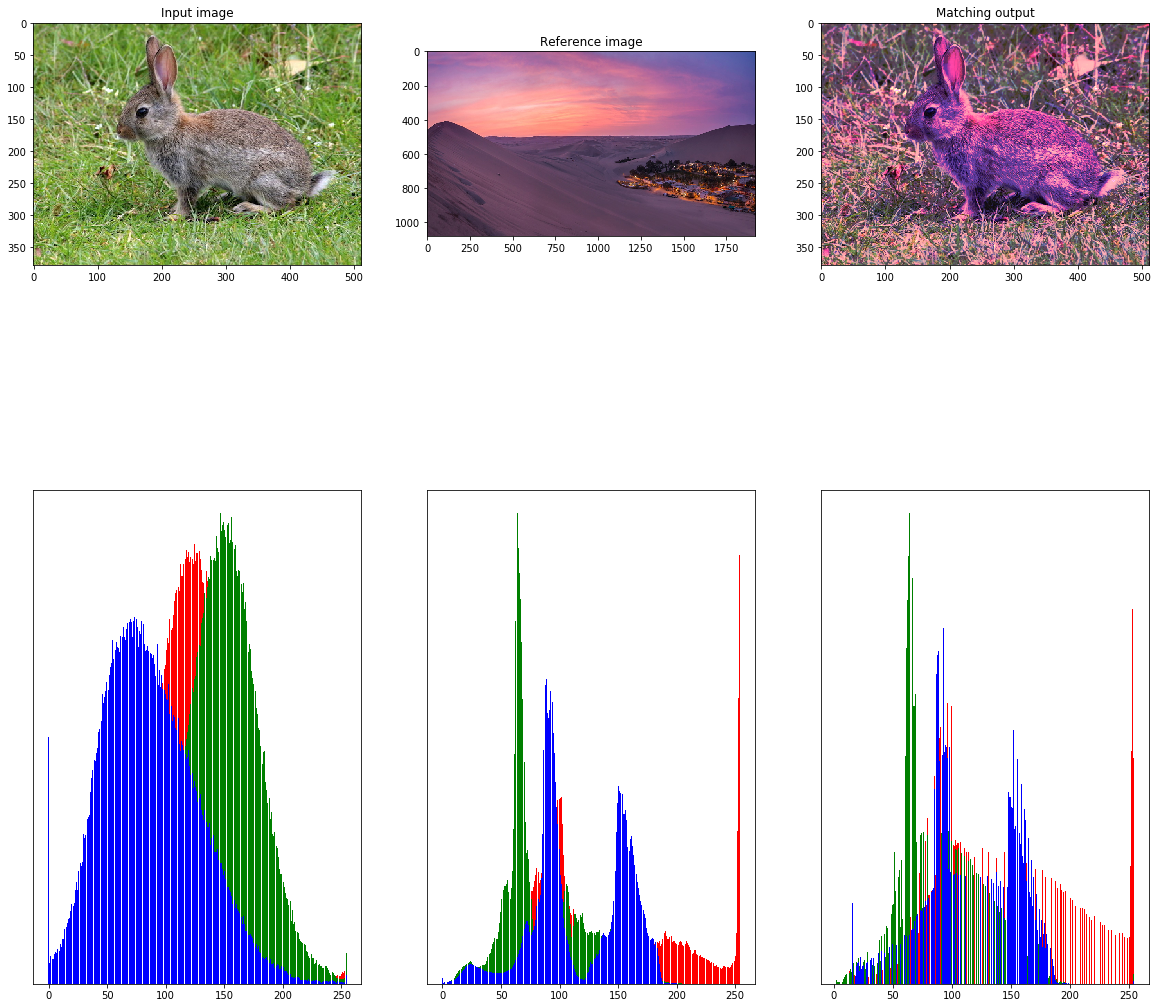

In [15]:
if __name__=='__main__':
    img    = cv2.imread("rabbit.jpg").astype(np.float32)
    img    = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgRef = cv2.imread("landscape.jpg").astype(np.float32)
    imgRef = cv2.cvtColor(imgRef, cv2.COLOR_BGR2RGB)

    imgOut0 = histogram_match(img[:,:,0], imgRef[:,:,0])
    imgOut1 = histogram_match(img[:,:,1], imgRef[:,:,1])
    imgOut2 = histogram_match(img[:,:,2], imgRef[:,:,2])
    imgOut  = np.stack([imgOut0, imgOut1, imgOut2], axis=2)
    
    plt.figure(figsize=(20, 20))
    plt.subplot(231)
    plt.title("Input image")
    plt.imshow(np.uint8(img))
    plt.subplot(232)
    plt.title("Reference image")
    plt.imshow(np.uint8(imgRef))
    plt.subplot(233)
    plt.title("Matching output")
    plt.imshow(imgOut)

    show_image(img   , 234)
    show_image(imgRef, 235)
    show_image(imgOut, 236)
    plt.show()

# Exercise

1. Given an 8$\times$8 image, the pixel value distribution of the image is shown as below, the gray scale $L=8$, please give the histogram after histogram equalization.

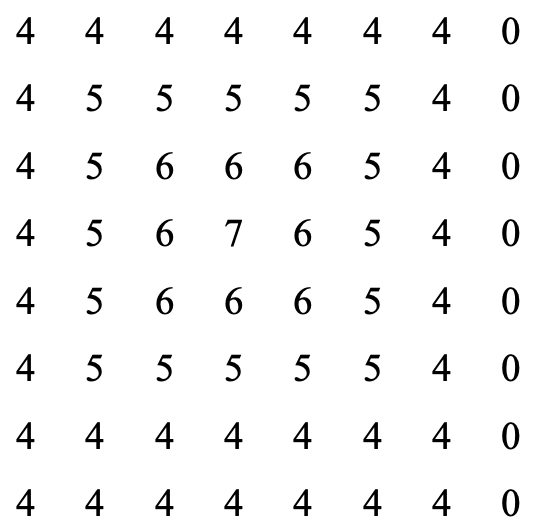